In [3]:
import base64
import requests
import os
from PIL import Image
from mistralai import Mistral

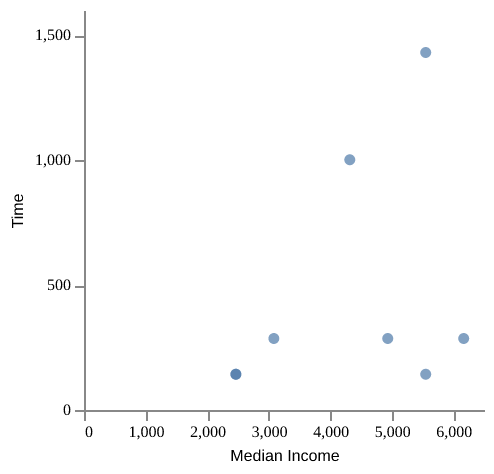

In [4]:
def encode_image(image_path):

    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return None
    except Exception as e:  
        print(f"Error: {e}")
        return None

image_path = "datasets/visdecode/0.png"
base64_image = encode_image(image_path)

Image.open(image_path).convert('RGB')

**Poor design practices**

In [5]:
api_key = "wZvsLgdJGNstGJVVSJLZPNT91Zcuvk10"
client = Mistral(api_key = api_key)

model = "pixtral-12b-2409"

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Identify and describe any poor design practices in the chart"
            },
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image}" 
            }
        ]
    }
]

chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)

The chart presented appears to be a scatter plot with "Median Income" on the x-axis and "Time" on the y-axis. However, there are several poor design practices that can affect the readability and interpretability of the chart:

1. **Lack of Axis Labels and Titles**: The chart does not have axis labels or a title. This makes it difficult for viewers to understand what the data represents and what the axes measure.

2. **Inconsistent Scaling**: The y-axis (Time) has a non-linear scale, while the x-axis (Median Income) appears to be linear. This inconsistency can make it challenging to compare data points accurately.

3. **Insufficient Data Points**: There are only a few data points on the chart. This limited data set can make it difficult to draw meaningful conclusions or identify trends.

4. **No Grid Lines**: The absence of grid lines can make it harder for viewers to estimate the values of data points and compare them accurately.

5. **No Legend**: If the chart is supposed to represent

**Vega-lite description**

In [6]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Extract vega lite description from this chart, including data values"
            },
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image}" 
            }
        ]
    }
]

chat_response = client.chat.complete(
    model=model,
    messages=messages
)

# Print the content of the response
print(chat_response.choices[0].message.content)

Certainly! Here is the Vega-Lite description for the scatter plot shown in the image:

```vega-lite
{
  "data": [
    {
      "values": [
        {"Median Income": 2000, "Time": 200},
        {"Median Income": 3000, "Time": 300},
        {"Median Income": 4000, "Time": 1000},
        {"Median Income": 5000, "Time": 400},
        {"Median Income": 6000, "Time": 300},
        {"Median Income": 7000, "Time": 1500}
      ]
    }
  ],
  "mark": "circle",
  "encoding": {
    "x": {"field": "Median Income", "type": "quantitative"},
    "y": {"field": "Time", "type": "quantitative"}
  }
}
```

This description specifies a scatter plot with circles as markers, where the x-axis represents "Median Income" and the y-axis represents "Time". The data points are explicitly listed in the "values" array.


**Structured output**

In [7]:
api_key = "wZvsLgdJGNstGJVVSJLZPNT91Zcuvk10"
client = Mistral(api_key = api_key)

model = "pixtral-12b-2409"

messages = [
            {
                "role": "system",
                "content": [
                    {"type": "text",
                     "text" : "Extract the text and data elements described by the user from the picture, and return the result formatted as a json in the following format : {name_of_element : [value]}"
                    }
                ]
            },
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "From this chart, extract the chart type, axis labels, title, and data values and return it as a string in a Json object"
                    },
                    {
                        "type": "image_url",
                        "image_url": f"data:image/jpeg;base64,{base64_image}" 
                    }
                ]
            }
        ]

chat_response = client.chat.complete(
    model=model,
    messages=messages,
    response_format={"type": "json_object"}
)

# Print the content of the response
print(chat_response.choices[0].message.content)

{
  "chart_type": "Scatter Plot",
  "x_axis_label": "Median Income",
  "y_axis_label": "Time",
  "title": "Time vs Median Income",
  "data_values": [
    {"Median Income": 2000, "Time": 100},
    {"Median Income": 3000, "Time": 200},
    {"Median Income": 4000, "Time": 1000},
    {"Median Income": 5000, "Time": 300},
    {"Median Income": 6000, "Time": 400},
    {"Median Income": 7000, "Time": 1500},
    {"Median Income": 8000, "Time": 1000}
  ]
}
